In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [ ]:
! wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv"
!wget "https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv"

--2020-10-08 08:26:29--  https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_training-set.csv
Resolving www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)... 202.58.60.197
Connecting to www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)|202.58.60.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32293018 (31M) [text/csv]
Saving to: ‘UNSW_NB15_training-set.csv’

UNSW_NB15_training- 100%[===================>]  30.80M   286KB/s    in 2m 16s  

2020-10-08 08:28:46 (232 KB/s) - ‘UNSW_NB15_training-set.csv’ saved [32293018/32293018]

--2020-10-08 08:28:46--  https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/a%20part%20of%20training%20and%20testing%20set/UNSW_NB15_testing-set.csv
Resolving www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)... 202.58.60.197
Connecting to www.unsw.adfa.edu.au (www.unsw.adfa.edu.au)|202.58.60.197|:443... connected.
HTTP request sent, awai

In [ ]:
trainSet = pd.read_csv('UNSW_NB15_training-set.csv')
trainSet_original=trainSet
testSet = pd.read_csv('UNSW_NB15_testing-set.csv')
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
trainSet_numerical=trainSet.drop(["proto","state","service","attack_cat","id"],axis=1)
trainSet_categorical=trainSet[["proto","state","service","attack_cat"]]

In [ ]:
trainSet.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
trainSet.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,16,30,0,0,0,30,30,0,Generic,1


In [ ]:
trainSet.shape

(175341, 45)

In [ ]:
trainSet.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


## About dataset
image.png

image.png
image.png
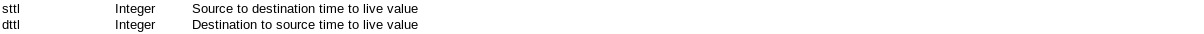
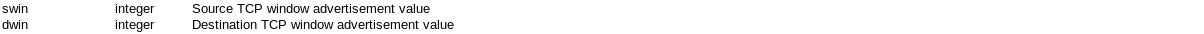
image.png
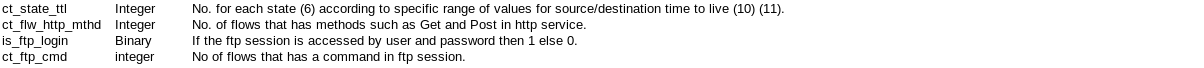
image.png

In [ ]:
trainSet.nunique()

id                   175341
dur                   74039
proto                   133
service                  13
state                     9
spkts                   480
dpkts                   443
sbytes                 7214
dbytes                 6660
rate                  76991
sttl                     11
dttl                      6
sload                 80885
dload                 77474
sloss                   409
dloss                   370
sinpkt                76161
dinpkt                74245
sjit                  77532
djit                  76831
swin                     13
stcpb                 75265
dtcpb                 75089
dwin                      7
tcprtt                43319
synack                40142
ackdat                37708
smean                  1357
dmean                  1328
trans_depth              11
response_body_len      2386
ct_srv_src               52
ct_state_ttl              5
ct_dst_ltm               50
ct_src_dport_ltm         47
ct_dst_sport_ltm    

In [ ]:
to_check_unique_vals=["proto","service","state","sttl","dttl","swin","dwin","trans_depth","ct_state_ttl","is_ftp_login","ct_ftp_cmd","ct_flw_http_mthd","attack_cat"]
for field in to_check_unique_vals:
  print(field,"\n",trainSet[field].unique(),end="\n\n")
# trainSet["proto"].nunique()

proto 
 ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2'
 'rd

In [ ]:
#Checking for null columns
trainSet.isnull().sum()
#no null values, no further processing needed

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

# Outlier Detection

### Z-score

In [ ]:
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


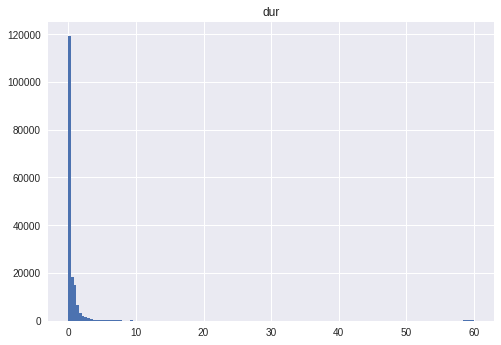

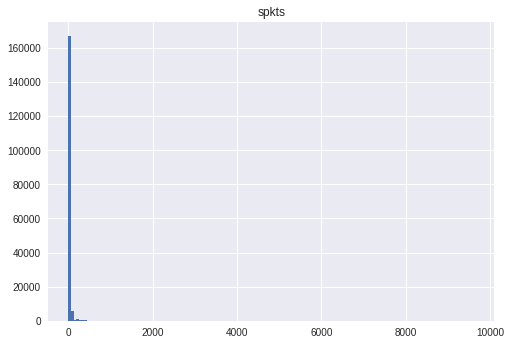

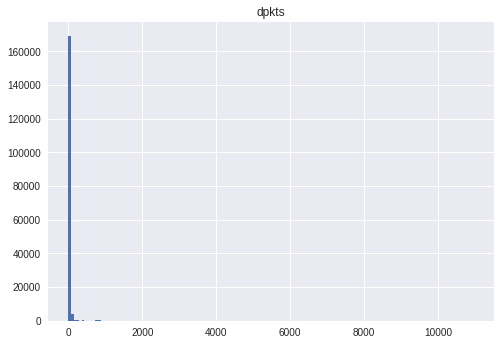

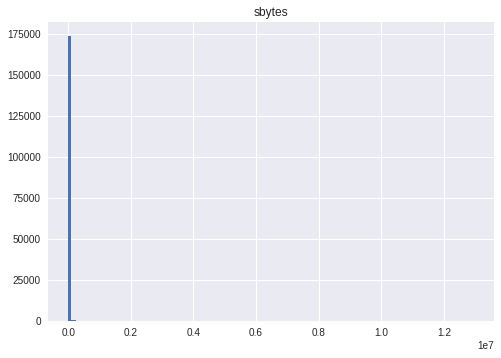

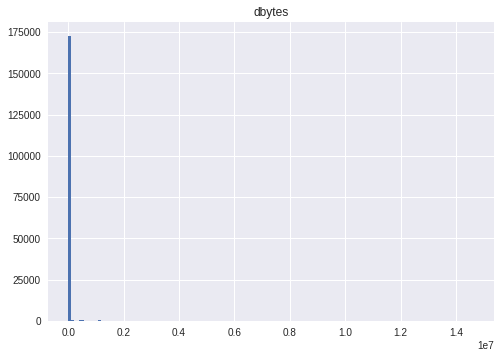

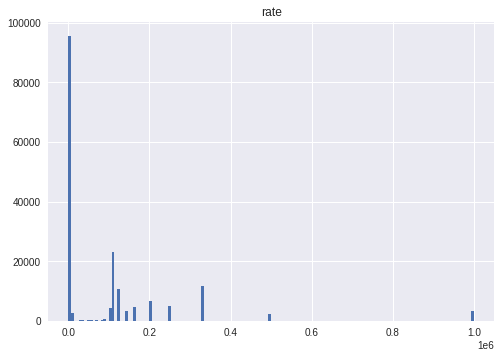

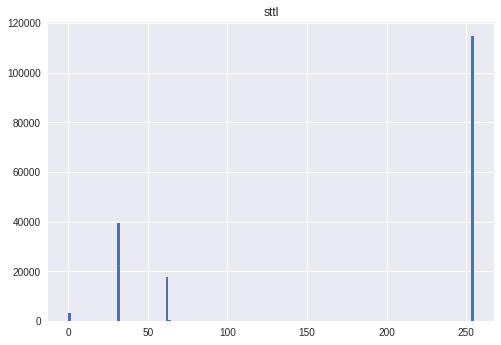

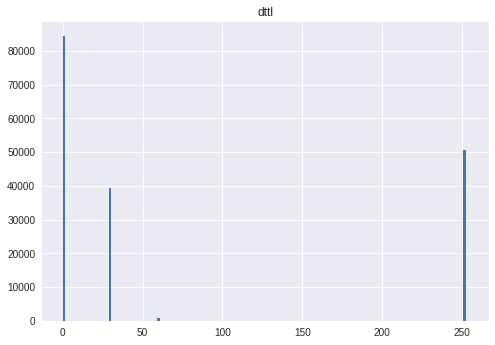

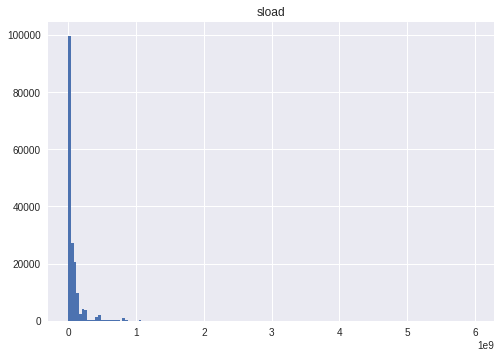

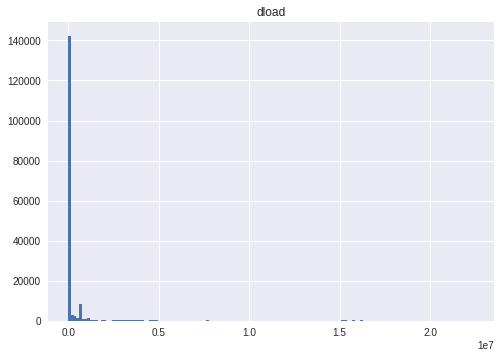

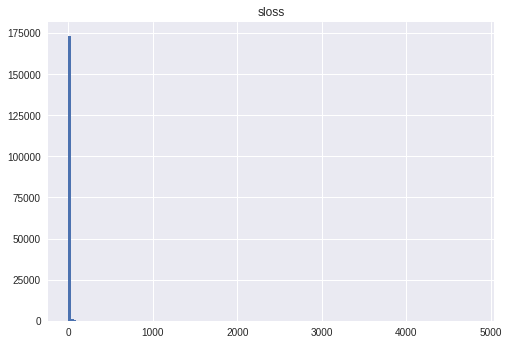

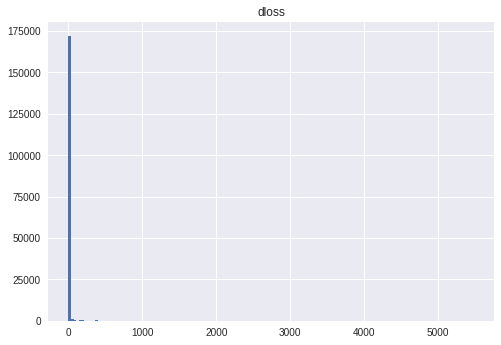

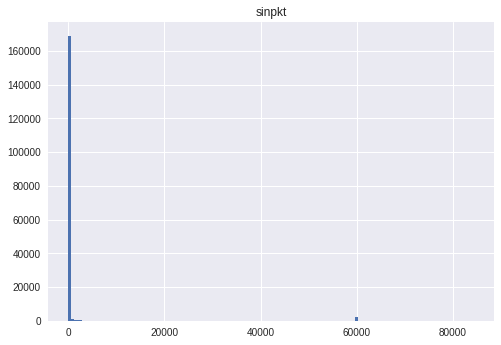

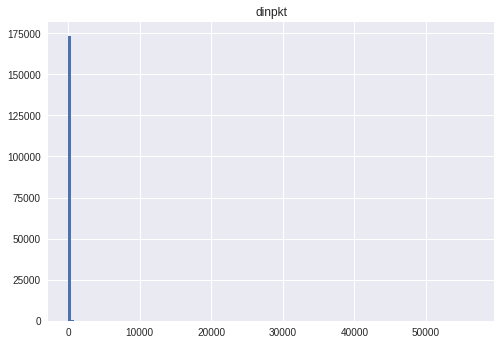

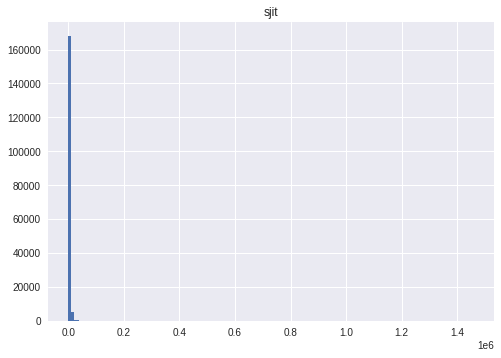

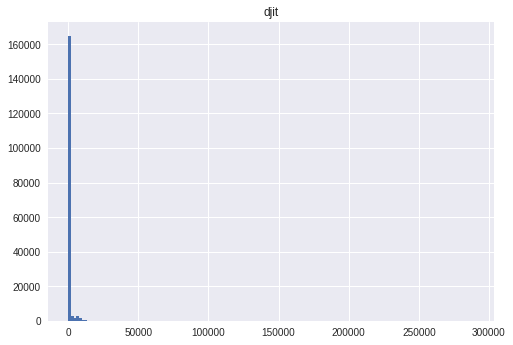

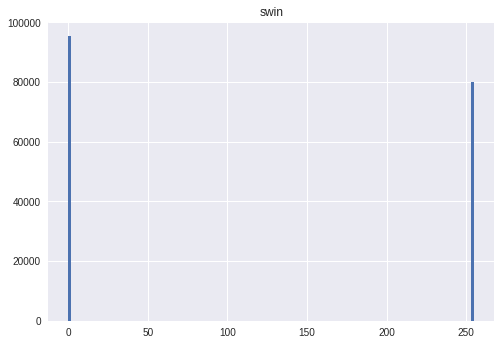

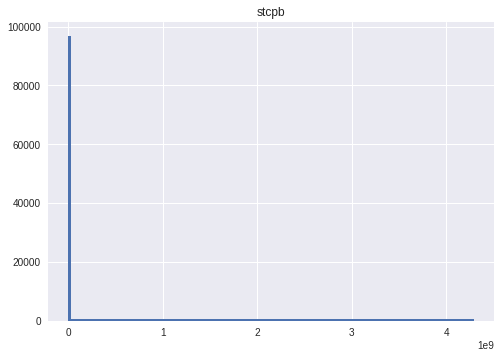

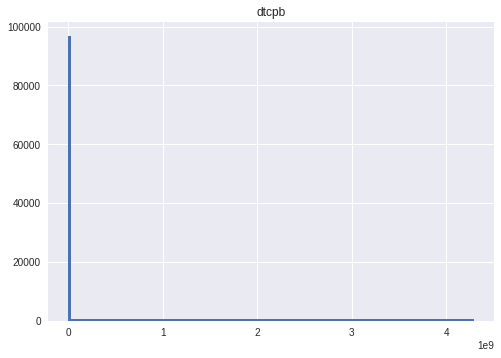

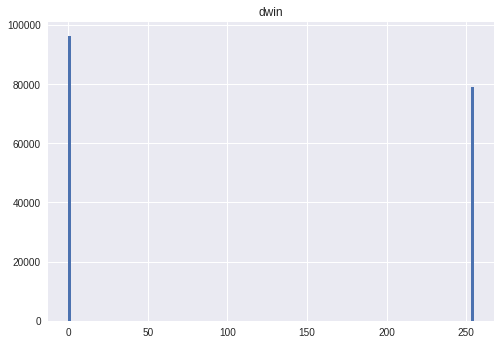

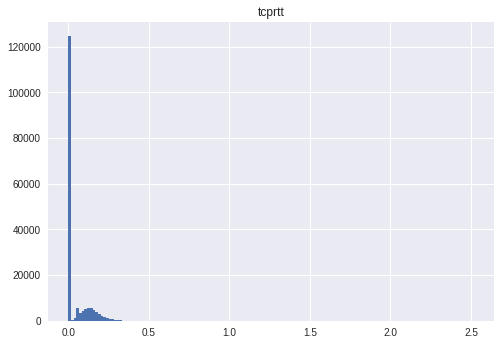

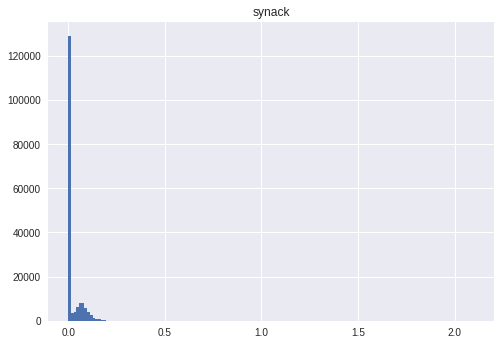

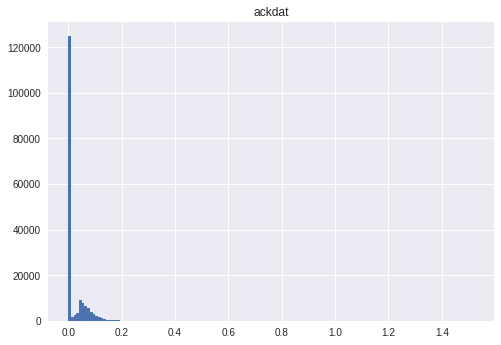

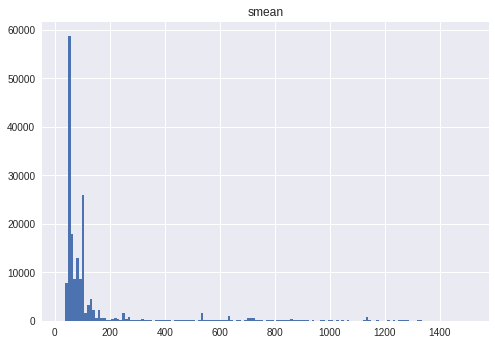

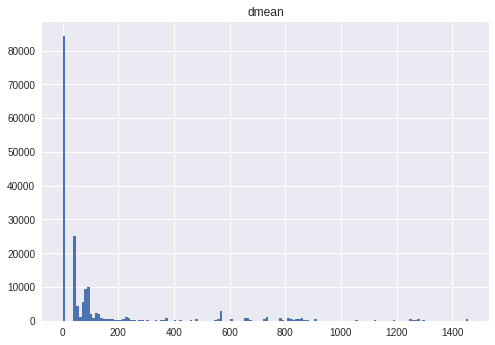

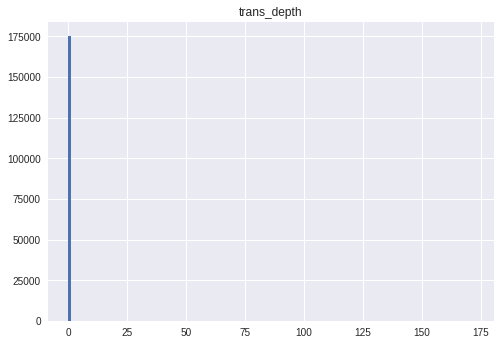

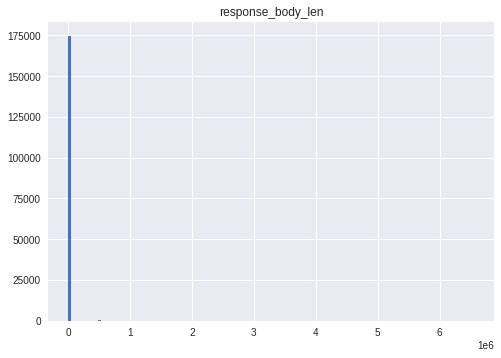

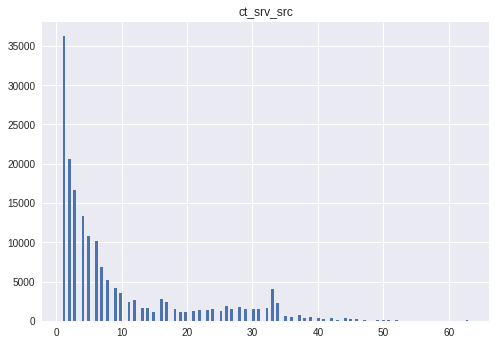

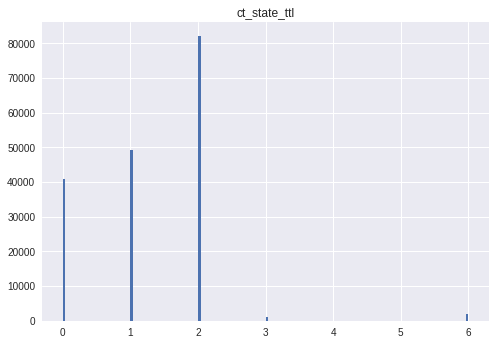

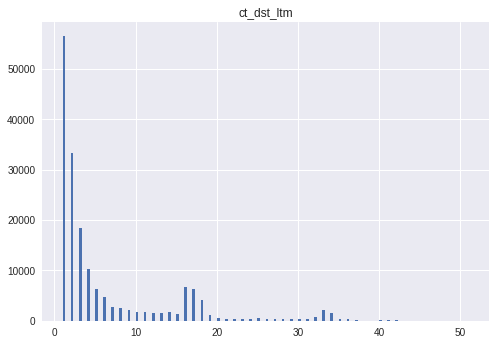

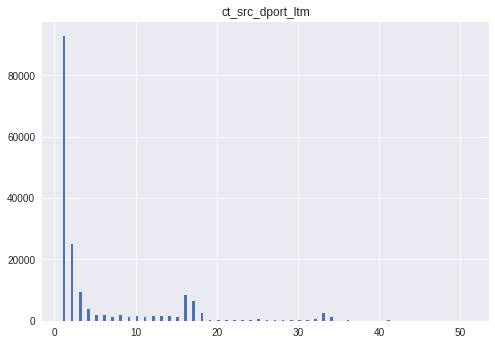

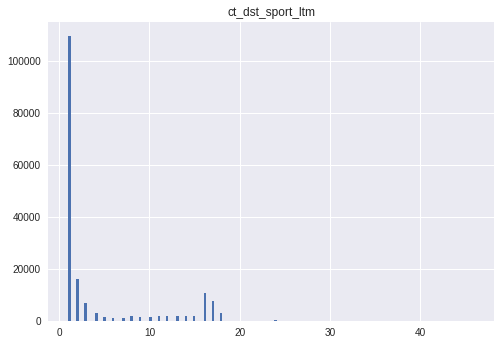

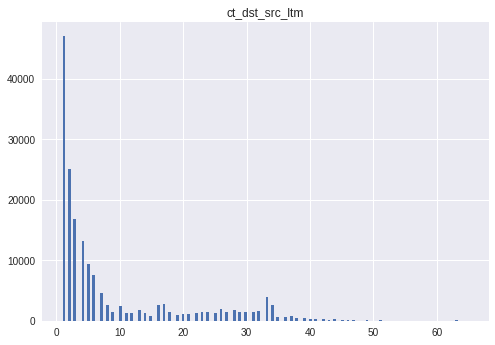

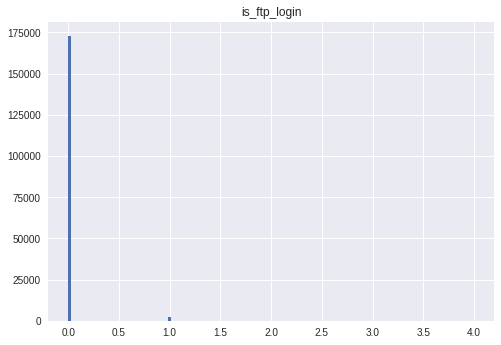

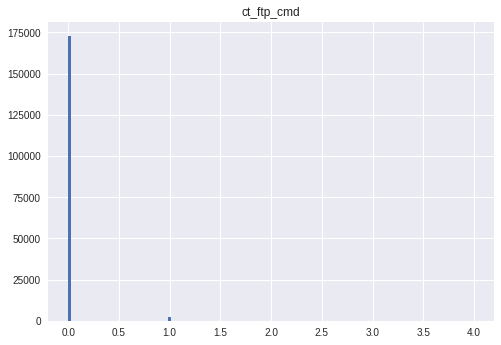

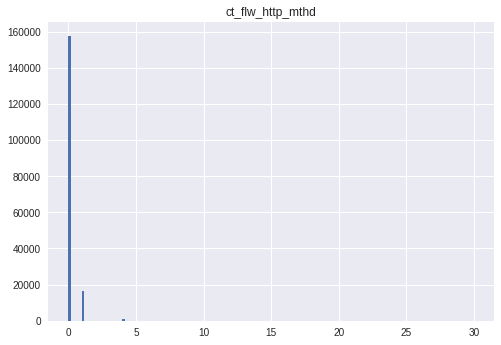

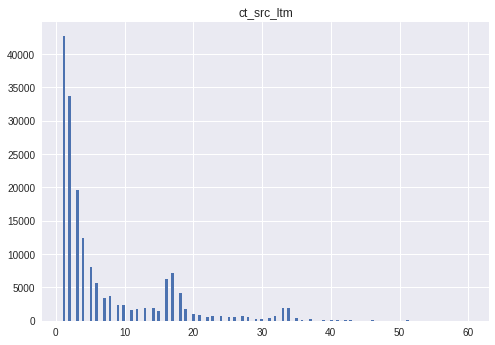

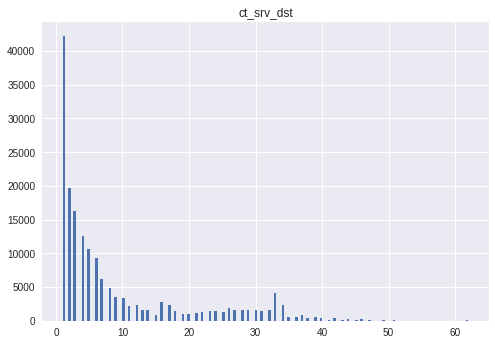

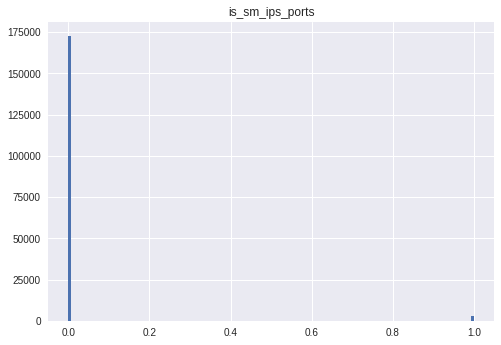

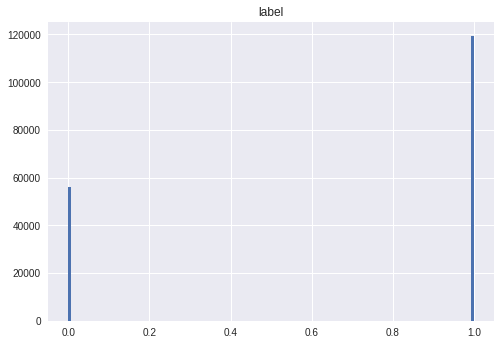

In [ ]:
for i in trainSet_numerical.columns:
  plt.figure()
  plt.hist(trainSet[i],bins=150,rwidth=1)
  plt.title(i)

In [ ]:
zs=stats.zscore(trainSet_numerical,axis=1).T
zs=np.absolute(zs)
print(zs.shape)
zs=zs.sum(axis=0)/40

(40, 175341)


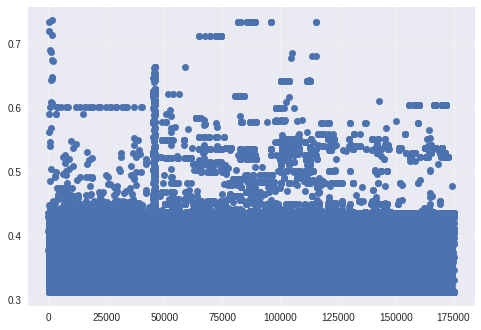

In [ ]:

fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
plt.plot(abs(zs),'o')


In [ ]:
outliers=[]
goodPoints=[]
for i in range(len(zs)):
  if zs[i]>0.435:
    outliers.append(i)
  else:
    goodPoints.append(zs[i])
print("Total: ",len(zs),"\n" ,"Outliers: ",len(outliers))

Total:  175341 
 Outliers:  21921


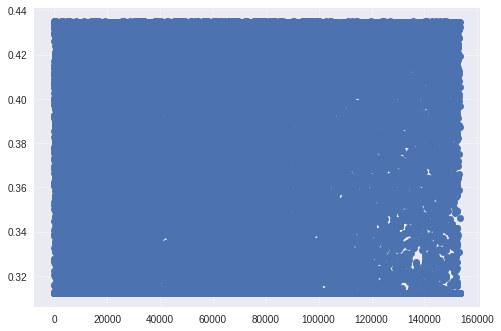

In [ ]:
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)
plt.plot(goodPoints,'o')

### DBSCAN
https://www.youtube.com/watch?v=C3r7tGRe2eI

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
# to select value of eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(trainSet_numerical)
distances, indices = nbrs.kneighbors(trainSet_numerical)

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
distances

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.69603818e+08, 3.71999744e+08, 3.88000578e+08])

Text(0.5, 1.0, 'nearest neighbors')

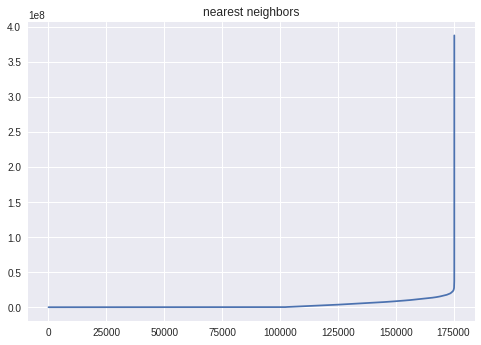

In [ ]:
plt.figure()
plt.plot(distances)
plt.title("nearest neighbors")

In [ ]:
#dont run program will crash
# dbscan=DBSCAN(eps=0.5*1e4,min_samples=2)

In [ ]:
model=dbscan.fit(trainSet_numerical)

NameError: ignored

In [ ]:
labels=model.labels_
labels

In [ ]:
#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True
sample_cores


In [ ]:
trues=np.sum(sample_cores)
outliers=len(sample_cores)-trues
print(outliers,len(sample_cores))

### Removing outliers on the basis of Z_score

In [ ]:
trainSet.tail()
# trainSet_outliers_removed=trainSet.drop([1,2],axis=0)
trainSet_outliers_removed=trainSet_original.drop(outliers,axis=0)
print(trainSet.shape)
print(trainSet_outliers_removed.shape)

(175341, 45)
(153420, 45)


## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
trainSet = trainSet_outliers_removed
pca = PCA(n_components = 3, svd_solver='full')
X = trainSet[trainSet.columns[5:43]]
X = StandardScaler().fit_transform(X)
X_new = pca.fit_transform(X)
temp = (pca.explained_variance_ratio_)
total = 0 
for i in temp:
  total+=i
print(total*100)
principalDf = pd.DataFrame(data = X_new , columns = ['principal component 1', 'principal component 2' , 'principal component 3'])
finalDf = pd.concat([principalDf, trainSet[['label']]], axis = 1)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

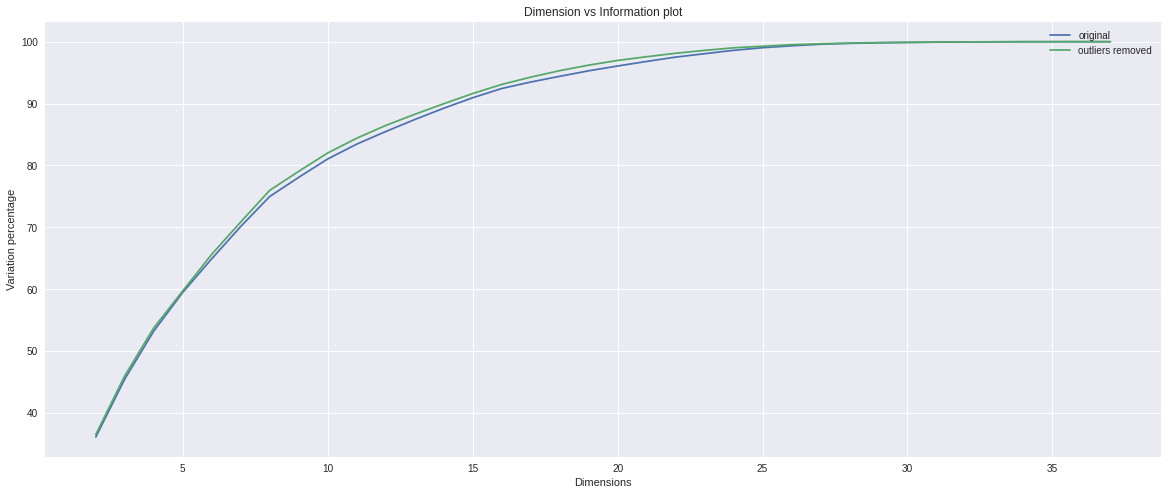

In [ ]:
plt.figure(figsize=(20,8))
#-----------Original Data
trainSet = trainSet_original
X = trainSet[trainSet.columns[5:43]]
X = StandardScaler().fit_transform(X)
xdata = []
ydata = np.linspace(2,37,36)
for tre in range(2,38):
  pca = PCA(n_components = tre, svd_solver='full')
  X_new = pca.fit_transform(X)
  temp = (pca.explained_variance_ratio_)
  total = 0 
  for i in temp:
    total+=i
  xdata.append(total*100)
plt.plot(ydata,xdata,label="original")
#-----------Outliers Removed
trainSet = trainSet_outliers_removed
X = trainSet[trainSet.columns[5:43]]
X = StandardScaler().fit_transform(X)
xdata = []
ydata = np.linspace(2,37,36)
for tre in range(2,38):
  pca = PCA(n_components = tre, svd_solver='full')
  X_new = pca.fit_transform(X)
  temp = (pca.explained_variance_ratio_)
  total = 0 
  for i in temp:
    total+=i
  xdata.append(total*100)
plt.plot(ydata,xdata,label="outliers removed")
plt.legend(loc="upper right")
plt.xlabel("Dimensions")
plt.ylabel("Variation percentage")
plt.title("Dimension vs Information plot")
plt.show()

# Feature Selection using wrapper method


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB

Naive bayes


In [ ]:
model=sfs(GaussianNB(),k_features=15,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
model.fit(trainSet_outliers_removed.drop(["label","proto","state","service","attack_cat","id","attack_cat"],axis=1),trainSet_outliers_removed["label"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    3.9s finished

[2020-10-08 08:43:52] Features: 1/15 -- score: 0.49698883258884174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    5.1s finished

[2020-10-08 08:43:57] Features: 2/15 -- score: 0.5047116882281152[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    5.6s finished

[2020-10-08 08:44:02] Features: 3/15 -- score: 0.5047782617238455[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.4s finished

[2020-10-08 08:44:08] Features: 4/15 -- score: 0.48950025442888734[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.9s finished

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=GaussianNB(priors=None,
                                               var_smoothing=1e-09),
                          floating=False, forward=True, k_features=15,
                          n_jobs=-1, pre_dispatch='2*n_jobs', scoring='r2',
                          verbose=2)

In [ ]:
model.k_feature_names_

('dur',
 'dpkts',
 'dttl',
 'dloss',
 'dinpkt',
 'djit',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'ct_state_ttl',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd')

Decision trees

In [ ]:
from sklearn import tree

In [ ]:
model=sfs(tree.DecisionTreeClassifier(),k_features=15,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
model.fit(trainSet_outliers_removed.drop(["label","proto","state","service","attack_cat","id"],axis=1),trainSet_outliers_removed["label"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   17.6s finished

[2020-10-08 09:06:35] Features: 1/15 -- score: 0.60074573674033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   14.7s finished

[2020-10-08 09:06:49] Features: 2/15 -- score: 0.6273763369285756[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   14.4s finished

[2020-10-08 09:07:04] Features: 3/15 -- score: 0.6483477205696764[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   15.1s finished

[2020-10-08 09:07:19] Features: 4/15 -- score: 0.6490800058101251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   15.7s finished

[2

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort

In [ ]:
model.k_feature_names_

('spkts',
 'dpkts',
 'sttl',
 'dttl',
 'sloss',
 'swin',
 'dwin',
 'trans_depth',
 'response_body_len',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'is_sm_ips_ports')

### For multiple classes

Naive B

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
model=sfs(GaussianNB(),k_features=15,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
trainSet_outliers_removed["attack_cat"][4:].to_numpy().reshape(-1,1)

array([['Normal'],
       ['Normal'],
       ['Normal'],
       ...,
       ['Generic'],
       ['Generic'],
       ['Generic']], dtype=object)

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(trainSet_outliers_removed["attack_cat"][4:].to_numpy().reshape(-1,1))
label_encoded = encoder.transform(trainSet_outliers_removed["attack_cat"][4:].to_numpy().reshape(-1,1))

In [ ]:
model.fit(trainSet_outliers_removed.drop(["label","proto","state","service","id","attack_cat"],axis=1)[4:],label_encoded)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    4.9s finished

[2020-10-08 09:04:11] Features: 1/15 -- score: -0.06041667933951218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    7.9s finished

[2020-10-08 09:04:19] Features: 2/15 -- score: -0.041363477350566356[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    8.5s finished

[2020-10-08 09:04:27] Features: 3/15 -- score: -0.07089035364598546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.3s finished

[2020-10-08 09:04:36] Features: 4/15 -- score: -0.0439995618878344[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    8.9s fi

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=GaussianNB(priors=None,
                                               var_smoothing=1e-09),
                          floating=False, forward=True, k_features=15,
                          n_jobs=-1, pre_dispatch='2*n_jobs', scoring='r2',
                          verbose=2)

In [ ]:
model.k_feature_names_

('dur',
 'spkts',
 'dpkts',
 'dload',
 'sloss',
 'trans_depth',
 'ct_srv_src',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports')

Decision Trees

In [ ]:
model=sfs(tree.DecisionTreeClassifier(),k_features=15,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
model.fit(trainSet_outliers_removed.drop(["label","proto","state","service","id","attack_cat"],axis=1)[4:],label_encoded)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   18.2s finished

[2020-10-08 09:15:01] Features: 1/15 -- score: 0.4294549619869992[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   24.8s finished

[2020-10-08 09:15:26] Features: 2/15 -- score: 0.5091828272922919[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   25.5s finished

[2020-10-08 09:15:52] Features: 3/15 -- score: 0.5426598924498316[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   23.4s finished

[2020-10-08 09:16:15] Features: 4/15 -- score: 0.5468823804540601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   24.0s finished



SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort

In [ ]:
model.k_feature_names_

('spkts',
 'sbytes',
 'sttl',
 'dttl',
 'sloss',
 'swin',
 'dwin',
 'smean',
 'trans_depth',
 'ct_state_ttl',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'is_sm_ips_ports')

# Prev Work 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testSet_Y,y_pred))
print(classification_report(testSet_Y,y_pred))

In [ ]:
#Feature Selection  -  Low Variance 

from sklearn.feature_selection import VarianceThreshold
X = trainSet_X
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(sel.fit_transform(X))




In [ ]:
#Feature Selection -  Univariate feature selection

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = trainSet_X , trainSet_Y
X.shape
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

In [ ]:
#Feature Selection -  L1 feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X, y = trainSet_X , trainSet_Y
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

In [ ]:
#Feature Selection -  Tree based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X, y = trainSet_X , trainSet_Y
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape) 